Client: Municipal risk managers 

Goal: reduce accident risks by area

Available data : list of restaurants 

Approach: find other public data that can be used to analyze and provide insights 

Visualizations 






Data provided by the city :

A list of 10,000 restaurants in the US that serve vegetarian or vegan food provided by Datafiniti's Business Database.

The dataset includes

	id

  dateAdded	

  dateUpdated

  address

  categories

  primaryCategories

  city

  claimed

  country

  cuisines

  description

  dateSeen

  descriptions

  sourceURLs

  descriptions.value

  facebookPageURL

  features.key

  features.value
  
  hours.day

  hours.dept

  hours.hour

  imageURLs
  
  isClosed
  
  keys
  
  languagesSpoken
  
  latitude
  
  longitude
  
  menuPageURL
  
  menus.amountMax
  
  menus.amountMin
  
  menus.category
  
  menus.currency
  
  menus.dateSeen
  
  menus.description
  
  menus.name
  
  menus.sourceURLs
  
  name
  
  paymentTypes
  
  phones
  
  postalCode
  
  priceRangeCurrency
  
  priceRangeMin
  
  priceRangeMax
  
  province
  
  sic
  
  sourceURLs
  
  twitter
  
  websites
  
  yearOpened




In [ ]:
#code followed from kaggle : https://www.kaggle.com/tentotheminus9/check-your-tires-and-your-shopping-basket

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install --upgrade google-cloud-bigquery
!pip3 install --user --upgrade google-cloud-bigquery
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objects as go
import plotly.express as px
!pip install --upgrade pandas
!pip install --upgrade google-cloud-bigquery[pandas]

#https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA
print(os.listdir('/content/drive/MyDrive/aaamlp-book/'))

Requirement already up-to-date: google-cloud-bigquery in /usr/local/lib/python3.7/dist-packages (2.20.0)
Requirement already up-to-date: google-cloud-bigquery in /usr/local/lib/python3.7/dist-packages (2.20.0)
Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.4)
Requirement already up-to-date: google-cloud-bigquery[pandas] in /usr/local/lib/python3.7/dist-packages (2.20.0)
['clusteringmnist.ipynb', 'winequality-red.csv', 'aaamlp.ipynb', 'restaurants.csv', '.ipynb_checkpoints', 'riskanalysis-316522-bced0470340c.json', 'restaurants.ipynb']


Analysis of data provided by the client 

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/aaamlp-book/restaurants.csv")

In [ ]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,claimed,country,cuisines,descriptions.dateSeen,descriptions.sourceURLs,descriptions.value,facebookPageURL,features.key,features.value,hours.day,hours.dept,hours.hour,imageURLs,isClosed,keys,languagesSpoken,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sic,sourceURLs,twitter,websites,yearOpened
0,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,"Squash, carrots, butternut squash and potato",Baked Kabocha,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
1,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With wild blend brown rice,Short Grain Brown Rice,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
2,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,NaN,Green Bean Veggie Soup,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
3,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,8.95,8.95,NaN,USD,2016-04-22T02:48:00.000Z,NaN,"Steamed Broccoli, Carrots and Turnips",https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
4,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With vinegar tahini beet dressing,Mixed Green Salad,https://foursquare.com/v/potala-organ

Visual analysis shows that there are many columns with NaN values and a discussion with the client through a survey ( a link will be provided ) shows that not all columns are useful attributes for our task 

We use Plotly Python Open Source Graphing Library for visualization 

Vegetarian and Vegan Restaurants database has 47 columns 

In [ ]:
nRowsRead = 10000 # specify 'None' if want to read whole file
# Datafiniti_Vegetarian_and_Vegan_Restaurants.csv has 10000 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/MyDrive/aaamlp-book/restaurants.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Vegetarian_and_Vegan_Restaurants.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 47 columns


In [ ]:
df1.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'claimed', 'country', 'cuisines',
       'descriptions.dateSeen', 'descriptions.sourceURLs',
       'descriptions.value', 'facebookPageURL', 'features.key',
       'features.value', 'hours.day', 'hours.dept', 'hours.hour', 'imageURLs',
       'isClosed', 'keys', 'languagesSpoken', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.category',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'menus.sourceURLs', 'name', 'paymentTypes', 'phones', 'postalCode',
       'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax', 'province',
       'sic', 'sourceURLs', 'twitter', 'websites', 'yearOpened'],
      dtype='object')

The datatypes of the columns are object and float 

In [ ]:
df1.dtypes

id                          object
dateAdded                   object
dateUpdated                 object
address                     object
categories                  object
primaryCategories           object
city                        object
claimed                     object
country                     object
cuisines                    object
descriptions.dateSeen      float64
descriptions.sourceURLs    float64
descriptions.value         float64
facebookPageURL             object
features.key               float64
features.value             float64
hours.day                  float64
hours.dept                 float64
hours.hour                 float64
imageURLs                   object
isClosed                    object
keys                        object
languagesSpoken            float64
latitude                   float64
longitude                  float64
menuPageURL                 object
menus.amountMax            float64
menus.amountMin            float64
menus.category      

For this exercise, we drop columns that contain NaN for any of the 10,000 restaurants.

At another time, a strategy can be put in place to collect data which are missing from this dataset. The attributes could  be useful attributes.

In [ ]:
df1 = df1.dropna(axis='columns')

In [ ]:
df1.sample(10)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,cuisines,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.dateSeen,menus.name,menus.sourceURLs,name,phones,postalCode,province,sourceURLs
5141,AVwc-fCFIN2L1WUfq7A6,2016-02-17T02:45:48Z,2018-07-01T12:32:54Z,3215 W Broad St,"Asian Restaurants,Restaurant,Caterers,Restaura...",Accommodation & Food Services,Richmond,US,"Indian,Vegetarian Friendly,Vegan Options,Glute...",us/va/richmond/3215wbroadst/12901807,37.566180,-77.474980,http://api.citygridmedia.com/content/places/v2...,7.00,7.00,"2018-01-29T10:01:10.043Z,2018-04-25T18:29:39.0...",Lasooni Gobhi,https://www.allmenus.com/va/richmond/320660-le...,Lemon Cuisine of India,(804) 204-1800,23230,VA,http://www.yellowpages.com/richmond-va/mip/lem...
8086,AV0Z4EeXLD2H7whiZOR0,2017-07-06T21:48:35Z,2018-05-12T09:56:13Z,9889 Bellaire Blvd,"Restaurant,Asian/Pacific,Dessert Shops,Juice S...",Accommodation & Food Services,Houston,US,"Asian/Pacific,Health Food,Vegetarian,Chinese",us/tx/houston/9889bellaireblvd/-381353877,29.704541,-95.555054,http://www.singlepage.com/juice-box,3.25,3.25,"2018-05-09T08:51:36.633Z,2018-01-30T17:05:53.4...",Mango ampamp Ice Cream,https://www.allmenus.com/tx/houston/40820-juic...,Juice Box,(713) 484-8085,77036,TX,https://www.allmenus.com/tx/houston/40820-juic...
1057,AVzA19T-FcQ3k02bBX1q,2017-06-19T14:53:09Z,2018-07-19T21:05:13Z,24 Pell St,"Chinese Restaurant,Restaurant,Vegetarian / Veg...",Accommodation & Food Services,New York,US,"Vegetarian,Dim Sum,Chinese",us/ny/newyork/24pellst/-314427681,40.715022,-73.998173,http://www.menupages.com/restaurants/vegetaria...,12.95,12.95,"2017-12-09T11:01:33.989Z,2017-12-07T10:53:18.0...",Black Mushrooms with Asparagus,http://www.menupages.com/restaurants/vegetaria...,Vegetarian Dim Sum House,(212) 577-7176,10013,NY,http://www.menupages.com/restaurants/vegetaria...
1033,AVzA19T-FcQ3k02bBX1q,2017-06-19T14:53:09Z,2018-07-19T21:05:13Z,24 Pell St,"Chinese Restaurant,Restaurant,Vegetarian / Veg...",Accommodation & Food Services,New York,US,"Vegetarian,Dim Sum,Chinese",us/ny/newyork/24pellst/-314427681,40.715022,-73.998173,http://www.menupages.com/restaurants/vegetaria...,6.25,6.25,"2018-04-18T20:44:42.298Z,2018-04-25T21:18:24.7...",Rice with Fresh Mushrooms,https://www.allmenus.com/ny/new-york/308087-ve...,Vegetarian Dim Sum House,(212) 577-7176,10013,NY,http://www.menupages.com/restaurants/vegetaria...
6554,AVwd29YvByjofQCxtH-J,2016-03-28T05:25:18Z,2018-06-18T16:54:14Z,1601 Central Ave,"Restaurant,American Restaurants,Coffee Shops,G...",Accommodation & Food Services,Charlotte,US,"American Restaurants,Caterers,Coffee Shops,Veg...",us/nc/charlotte/1601centralave/489718227,35.220338,-80.811749,http://www.citysearch.com/profile/menu/6022757...,7.25,7.25,"2018-02-15T20:02:46.256Z,2018-05-04T04:37:35.8...",The Zada Jane 28205 Basic Breakfast,https://www.allmenus.com/nc/charlotte/272610-z...,Zada Janes Corner Cafe,(704) 332-3663,28205,NC,https://www.allmenus.com/nc/charlotte/272610-z...
6401,AVwdKojjByjofQCxmLy0,2015-10-23T03:16:12Z,2018-06-21T17:07:40Z,503 Main St,"Restaurant,Asian Restaurant,Thai restaurants,R...",Accommodation & Food Services,Evanston,US,"Thai,Thai Restaurants,Japanese,Asian,Sushi,Veg...",us/il/evanston/503mainst/1314782564,42.033935,-87.677839,http://api.citygridmedia.com/content/places/v2...,10.00,10.00,"2018-06-07T15:19:17.845Z,2018-05-04T10:35:57.781Z",Vegetarian Delight Pad Pak,https://www.allmenus.com/il/evanston/300039-si...,Siam Paragon,(847) 332-2302,60202,IL,http://www.yellowbook.com/profile/siam-paragon...
7653,AVwc6YmE_7pvs4fz0Sw6,2016-03-26T04:22:07Z,2018-05-28T16:11:04Z,3105 Commodore Plz,"New American Restaurant,Tapas Restaurant,New A...",Accommodation & Food Services,Miami,US,"Traditional American,Seafood,Vegetarian,Hambur...",us/fl/miami/3105commodoreplz/-254227588,25.726881,-80.243931,http://api.citygridmedia.com/content/places/v2...,10.00,10.00,"2018-02-26T12:46:16.042Z,2018-03-01T21:31:19.7...","Pino

We end up with 23 attributes fully populated for each restaurant. We proceed to remove any duplicate rows. 

In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 23 columns


Removing the NaN and duplicates , our final dataset has 12 columns and 10,000 rows. 


In [ ]:
df1.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'cuisines', 'keys', 'latitude',
       'longitude', 'menuPageURL', 'menus.amountMax', 'menus.amountMin',
       'menus.dateSeen', 'menus.name', 'menus.sourceURLs', 'name', 'phones',
       'postalCode', 'province', 'sourceURLs'],
      dtype='object')

We filter out and keep the useful attributes 

In [ ]:
df1=pd.DataFrame(df1, columns = ['address', 'categories','city','country', 'cuisines', 'latitude' , 'longitude', 'menus.amountMax', 'menus.amountMin', 'name',  'postalCode','province'])


In [ ]:
df1.shape

(10000, 12)

Word cloud of cuisines served 

There are 462273 words in the combination of all cuisines data.


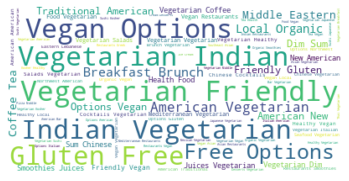

In [ ]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
text = " ".join(review for review in df1.cuisines)
print ("There are {} words in the combination of all cuisines data.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The cuisines that stand out across the country are Vegetarian Indian, Gluten Freen, Vegan Options, Vegetarian Friendly, Indian Vegetarian.
 

In [ ]:
df1.shape

(10000, 12)

In [ ]:
df1_count_by_province = df1.groupby(['province']).agg('address').count()
df1_count_by_province = df1_count_by_province.to_frame()
df1_count_by_province = df1_count_by_province.reset_index()
df1_count_by_province.columns = ['state', 'count']

Restaurants count by province

In [ ]:
fig = px.bar(df1_count_by_province, x='province', y='count')
fig.show()

Maximum restaurants are in NY 

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [ ]:
df2 = pd.DataFrame(list(us_state_abbrev.items()),columns = ['state_name','state']) 

In [ ]:
df2

,state_name,state
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


We find relevant public datasets that can provide insights, from Bigquery 
The basis for choosing the public dataset is that they should have information based in the same geographical area, which is the US. 


Create a json key for the service account and upload to drive  

In [ ]:
!gcloud auth login csml1020gk@gmail.com

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=u9xpUU8AH0PleHfmuOmrHMhLn1T6Rm&prompt=consent&access_type=offline&code_challenge=rE4gt3A_20uAMFsJrOGmFpVsZQlkiDKoD48G-58H89Q&code_challenge_method=S256

Enter verification code: 4/1AY0e-g6chMaNroDYCpG-sF3mWIqJISnMdJR2hNZQbxqtpCfVFV9keQm-uCw

You are now logged in as [csml1020gk@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID



Use the Cloud SDK to create a service account and then create credentials you will need to authenticate as the service account

We may have to delete the json file for the service account and  create a new one 

 https://codelabs.developers.google.com/codelabs/cloud-bigquery-python#3


In [ ]:
!gcloud config set project riskanalysis-316522

!export PROJECT_ID=$(gcloud config get-value core/project)

!gcloud config list

Updated property [core/project].
[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = csml1020gk@gmail.com
project = riskanalysis-316522

Your active configuration is: [default]


In [ ]:
# import libraries
from google.oauth2 import service_account
from google.cloud import bigquery
# I like pandas gbq because it can infer schema
# https://pandas-gbq.readthedocs.io/en/latest/writing.html#inferring-the-table-schema
import pandas_gbq


KEY_PATH = "/content/drive/MyDrive/aaamlp-book/riskanalysis-316522-bced0470340c.json"

# read the credentials from our file
# scopes are not necessary because we defined them in GCP already
CREDS = service_account.Credentials.from_service_account_file(KEY_PATH)

# the client object will be used to interact with BQ
client = bigquery.Client(credentials=CREDS, project=CREDS.project_id)

A data frame to store each query 

Query - 2015 accidents 

In [ ]:
Q3 = """
SELECT * 
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
"""
# labelling our query job
query_job3 = client.query(Q3)

# 2015 results as a dataframe
df3 = query_job3.result().to_dataframe()
df3

/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/table.py:1531: UserWarning:

Dependency google-cloud-bigquery-storage is outdated, please upgrade it to version >= 2.0.0 (version found: legacy).



,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,national_highway_system,land_use,land_use_name,functional_system,functional_system_name,ownership,ownership_name,route_signing,route_signing_name,trafficway_identifier,trafficway_identifier_2,milepoint,latitude,longitude,special_jurisdiction,special_jurisdiction_name,first_harmful_event,first_harmful_event_name,manner_of_collision,manner_of_collision_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway,relation_to_trafficway_name,light_condition,light_condition_name,atmospheric_conditions_1,atmospheric_conditions_1_name,atmospheric_conditions_2,atmospheric_conditions_2_name,atmospheric_conditions,atmospheric_conditions_name,school_bus_related,rail_grade_crossing_identifier,hour_of_notification,minute_of_notification,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190204,1,1,0,0,0,1,1,109,0,11,9,2015,6,20,20,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-510TH ST,,0,43.499950,-94.035428,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,20,28,20,30,21,2,0,None,0,None,0,None,1,1,2015-09-11 20:20:00+00:00
1,19,Iowa,190233,1,1,0,0,0,1,1,181,0,1,11,2015,1,0,30,1,1,Rural,3,Principal Arterial – Other,1,State Highway Agency,2,U.S. Highway,US-65,,245,41.470728,-93.558444,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighted,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,88,88,88,88,88,88,0,None,0,None,0,None,1,1,2015-11-01 00:30:00+00:00
2,19,Iowa,190179,1,1,0,0,0,2,2,193,0,4,5,2015,2,16,18,0,1,Rural,5,Major Collector,2,County Highway Agency,4,County Road,CR-K42 DALLAS AVE,CR-300TH ST,0,42.272072,-96.232194,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,3,Intersection Related,Four-Way Intersection,None,4,On Roadside,1,Daylight,2,Rain,0,No Additional Atmospheric Conditions,2,Rain,No,0000000,16,27,16,34,17,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00
3,19,Iowa,190248,1,1,0,0,0,4,4,99,0,17,11,2015,3,12,26,1,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-80,,188,41.681933,-92.983681,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,10,Cloudy,2,Rain,2,Rain,No,0000000,12,25,12,34,99,99,0,None,0,None,0,None,2,0,2015-11-17 12:26:00+00:00
4,19,Iowa,190231,1,1,0,0,0,1,1,121,0,31,10,2015,7,4,49,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-290TH ST,,0,41.228814,-93.970375,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighted,2,Rain,0,N

Is there a link between the location of the restaurants and the fatalities/accidents in 2015, assuming the restaurants data is from 2015 ?


In [ ]:
Q4 = """SELECT longitude, latitude, number_of_fatalities, timestamp_of_crash, state_name
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        WHERE number_of_drunk_drivers > 0
        AND longitude < 0
        AND longitude > -140
       """ 


# labelling our query job
query_job4 = client.query(Q4)

# 2015 results as a dataframe
df4 = query_job4.result().to_dataframe()
df4

/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/table.py:1531: UserWarning:

Dependency google-cloud-bigquery-storage is outdated, please upgrade it to version >= 2.0.0 (version found: legacy).



,longitude,latitude,number_of_fatalities,timestamp_of_crash,state_name
0,-94.035428,43.499950,1,2015-09-11 20:20:00+00:00,Iowa
1,-93.558444,41.470728,1,2015-11-01 00:30:00+00:00,Iowa
2,-91.035231,41.803606,1,2015-03-16 00:00:00+00:00,Iowa
3,-93.872936,42.584494,1,2015-04-26 19:00:00+00:00,Iowa
4,-91.376422,42.652731,1,2015-03-29 02:34:00+00:00,Iowa
...,...,...,...,...,...
9128,-76.988156,38.852608,1,2015-07-14 22:18:00+00:00,District of Columbia
9129,-76.913475,38.889697,1,2015-11-21 21:18:00+00:00,District of Columbia
9130,-76.958656,38.931428,1,2015-03-22 03:12:00+00:00,District of Columbia
9131,-77.003003,38.880783,1,2015-07-26 02:25:00+00:00,District of Columbia


Plotly interactive plot 

This shows the locations of the accidents, with the size of each point scaled to the number of fatalities and the hover-over text the date and time of the accident. 


In [ ]:
import datetime
df4['timestamp_of_crash'] = df4['timestamp_of_crash'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M"))

In [ ]:


import pandas as pd
#https://plotly.com/python/scatter-plots-on-maps/?_ga=2.125364554.1363478013.1623505981-1615356905.1623505981
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df4['text'] = df4['number_of_fatalities'].astype(str) + '' + 'When: ' + df4['timestamp_of_crash'].astype(str)




fig = go.Figure(data=go.Scattergeo(
        lon = df4['longitude'],
        lat = df4['latitude'],
        text = df4['text'],
        mode = 'markers',
        marker_color = df4['number_of_fatalities']
        ))

fig.update_layout(
        title = 'Fatalities by location',
        geo_scope='usa',
    )
fig.show()





Next, let's have a look at which months saw what numbers of fatality-related accidents,

In [ ]:

Q5 = """SELECT month_of_crash, count(month_of_crash) AS months_totals
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY month_of_crash
ORDER BY months_totals DESC""" 



# labelling our query job
query_job5 = client.query(Q5)

# 2015 results as a dataframe
df5 = query_job5.result().to_dataframe()
df5




/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/table.py:1531: UserWarning:

Dependency google-cloud-bigquery-storage is outdated, please upgrade it to version >= 2.0.0 (version found: legacy).



,month_of_crash,months_totals
0,10,3070
1,8,3049
2,7,3021
3,9,2904
4,5,2869
5,12,2861
6,6,2790
7,11,2780
8,4,2439
9,3,2401


In [ ]:
Q6 = """SELECT latitude, longitude, consecutive_number 
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
""" 
# labelling our query job
query_job6 = client.query(Q6)

# 2015 results as a dataframe
df6 = query_job6.result().to_dataframe()
df6

/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/table.py:1531: UserWarning:

Dependency google-cloud-bigquery-storage is outdated, please upgrade it to version >= 2.0.0 (version found: legacy).



,latitude,longitude,consecutive_number
0,43.499950,-94.035428,190204
1,41.470728,-93.558444,190233
2,42.272072,-96.232194,190179
3,41.681933,-92.983681,190248
4,41.228814,-93.970375,190231
...,...,...,...
32533,38.941897,-77.036422,110019
32534,38.931428,-76.958656,110003
32535,38.880783,-77.003003,110014
32536,38.870961,-76.942394,110004


Merg ing template 

#pd.merge(df1, df2, how='type of join', on=['df1 key', 'df2 key'])


Distribution of fatalities by incident 

In [ ]:

Q7 = """SELECT number_of_fatalities  
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
""" 
# labelling our query job
query_job7 = client.query(Q7)

# 2015 results as a dataframe
df7 = query_job7.result().to_dataframe()
df7




/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/table.py:1531: UserWarning:

Dependency google-cloud-bigquery-storage is outdated, please upgrade it to version >= 2.0.0 (version found: legacy).



,number_of_fatalities
0,1
1,1
2,1
3,2
4,1
...,...
32533,1
32534,1
32535,1
32536,1


Plot of number of fatalities per incident 

Most incidents ended up with one fatality 

In [ ]:
y = df7['number_of_fatalities']

import plotly.express as px
fig = px.histogram(df7, x="number_of_fatalities")
fig.show()







Total number of fatalities by month 

In [ ]:
fig = px.scatter(df5, x="month_of_crash", y="months_totals")
fig.show()

Fatalities by state

In [ ]:
Q8 = """SELECT state_name, 
    sum(number_of_fatalities) AS fatality_total
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    GROUP BY state_name
    ORDER BY fatality_total DESC
""" 
# labelling our query job
query_job8 = client.query(Q8)

# 2015 results as a dataframe
df8 = query_job8.result().to_dataframe()
df8

/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/table.py:1531: UserWarning:

Dependency google-cloud-bigquery-storage is outdated, please upgrade it to version >= 2.0.0 (version found: legacy).



,state_name,fatality_total
0,Texas,3582
1,California,3387
2,Florida,2938
3,Georgia,1432
4,North Carolina,1379
5,Pennsylvania,1200
6,New York,1136
7,Ohio,1110
8,Illinois,998
9,South Carolina,979


So we have number of fatalities by state in df8 and  number of restaurants by state in df1_count_by_province

Accidents data - add column abbreviation  


In [ ]:
#https://datatofish.com/join-pandas-dataframes-merge/


df8_abb = pd.DataFrame(list(us_state_abbrev.items()), columns=['state_name', 'abb'])

Sample of each table

In [ ]:
df1_count_by_province.sample()

,state,count
1,CA,1019


In [ ]:
df8.sample()

,state_name,fatality_total
3,Georgia,1432


In [ ]:
df2.sample()

,state_name,state
21,Michigan,MI


Merge data frames and visualize as a stacked bar chart 

In [ ]:
import pandas as pd
df9 = pd.merge(df8, df2, how = 'inner', on = ['state_name', 'state_name'])

In [ ]:
df10 = pd.merge(df9, df1_count_by_province, how = 'inner', on = ['state', 'state'])

In [ ]:
df10

,state_name,fatality_total,state,count
0,Texas,3582,TX,390
1,California,3387,CA,1019
2,Florida,2938,FL,528
3,Georgia,1432,GA,5
4,North Carolina,1379,NC,323
5,Pennsylvania,1200,PA,271
6,New York,1136,NY,5361
7,Illinois,998,IL,451
8,Michigan,967,MI,95
9,Tennessee,962,TN,17


In [ ]:


fig = go.Figure(data=[
    go.Bar(name='Fatalities', x=df10.state, y=df10["fatality_total"].to_list()),
    go.Bar(name='Restaurant counts', x=df10.state, y=df10["count"].to_list())
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

From this analysis we see that fatalities are most in Texas but the number of restaurants are less 

The number of restaurants are more in New York but the fatalities are lesser 

To do : find data on US bars to use instead of the restaurants data 